In [84]:
# Pull the data into this Python session:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns
GamesDF = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
GamesDF.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
# First, I create a variable which contains the data frame where all rows with ANY (even one) missing value is dropped
GamesDF_Dropped_All = GamesDF.dropna()
GamesDF_Dropped_All.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


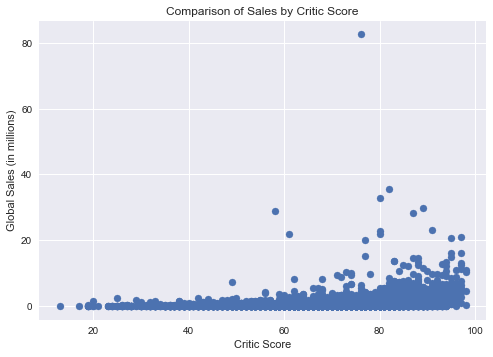

In [86]:
# Next, I will create a scatterplot to get a feel for how the data looks
plt.scatter(GamesDF_Dropped_All.Critic_Score, GamesDF_Dropped_All.Global_Sales)
plt.xlabel("Critic Score")
plt.ylabel("Global Sales (in millions)")
plt.title("Comparison of Sales by Critic Score")
plt.show()
# There appears to be a loose positive linear trend with this data

In [87]:
# Another thing to keep in mind is the release date
# A game release in 2006 has had 11 years to accumulate wealth, while a game release in 2015 had only 2 year to accumulate wealth
# For this reason, we will have a more accurate assesment if we compare the games that were released in the same year
# Let's start with 2006, since this year seems to be very intersting, due to the fact that many of the high selling games-
# (including Wii Sports, the game with the #1 highest sales) were released in 2006

GamesDF2006_Dropped_All = GamesDF_Dropped_All[GamesDF_Dropped_All.Year_of_Release == 2006]
GamesDF2006_Dropped_All.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
107,The Legend of Zelda: Twilight Princess,Wii,2006.0,Action,Nintendo,3.74,2.14,0.60,0.68,7.15,95.0,73.0,9,1658.0,Nintendo,T
142,Gears of War,X360,2006.0,Shooter,Microsoft Game Studios,3.54,1.88,0.07,0.60,6.09,94.0,88.0,8.3,2295.0,Epic Games,M


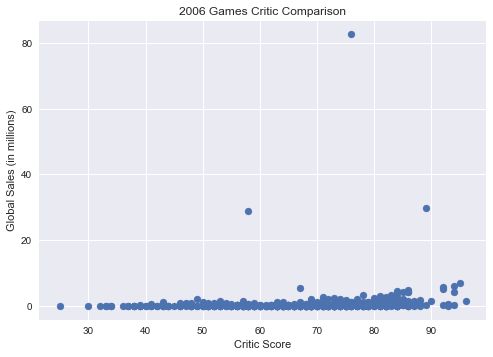

In [88]:
# Now, let's see what the plot looks like

plt.scatter(GamesDF2006_Dropped_All.Critic_Score, GamesDF2006_Dropped_All.Global_Sales)
plt.xlabel("Critic Score")
plt.ylabel("Global Sales (in millions)")
plt.title("2006 Games Critic Comparison")
plt.show()

# There appears to be a slight positive linear trend
# However, the three outliers are very interesting
# These three games are "Wii Sports", "New Super Mario Bros.", and "Wii Play"
# Two of these games - "Wii Sports" and "Wii Play" - came bundled with the something else
# "Wii Sports" came included with the Wii Console and "Wii Play" came included with the purchase of an extra Wii Remote
# With this in mind, the sale of these games are directly parellel with the sale of wii consoles and - in some cases --
# extra Wii Remotes
# This is important for game developers/investors to be aware of, which is that game sales will drastically - 
# increase if they come bundled with a gaming console

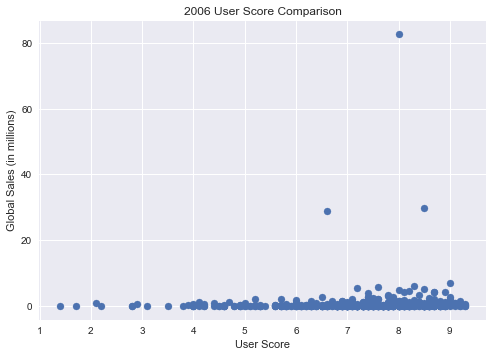

In [89]:
# As for "New Super Mario Bros", I didn't find any evidence of it regularly coming bundled with any console or accessory
# And according to (http://www.vgchartz.com/game/1582/new-super-mario-bros/), the global sales were 29.81 million, showing 
# that this is not an error in the data I have.

# Let's see how the "User Score" compares:

plt.scatter(GamesDF2006_Dropped_All.User_Score, GamesDF2006_Dropped_All.Global_Sales)
plt.xlabel("User Score")
plt.ylabel("Global Sales (in millions)")
plt.title("2006 User Score Comparison")
plt.show()

# It appears that User Score provides a more positive linear correlation, and would be a more reliable predictor of game sales.
# This would appear to make sense, because it is the USERS, not the CRITICS who are purchasing the most games

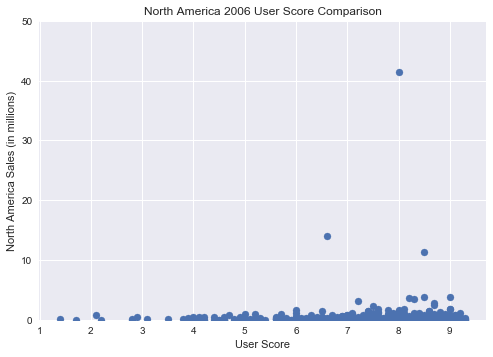

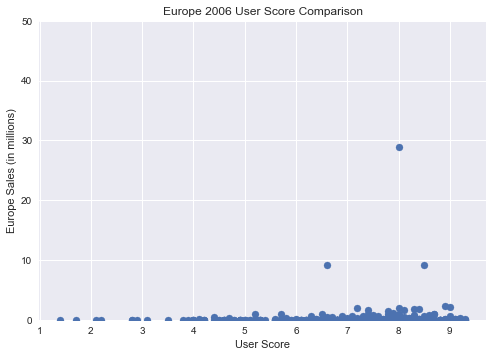

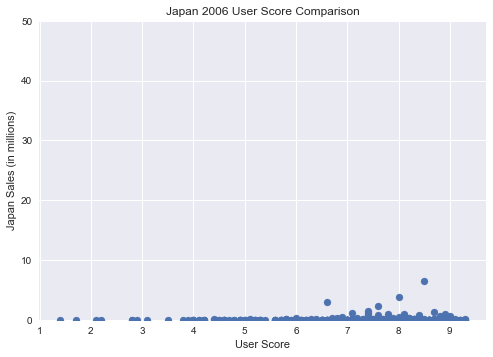

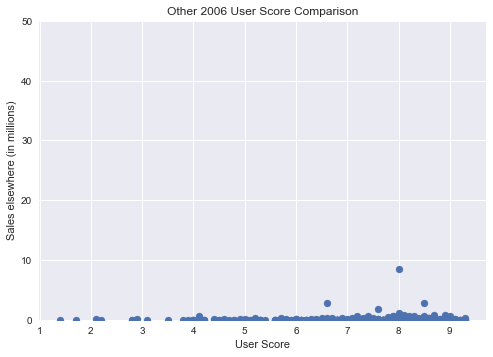

In [90]:
# Based on my brief look at the dataframe itself, it appears that most of the sales are in North America, but I will -
# plot it just to give a more definitive visual confirmation

plt.scatter(GamesDF2006_Dropped_All.User_Score, GamesDF2006_Dropped_All.NA_Sales)
plt.xlabel("User Score")
plt.ylabel("North America Sales (in millions)")
plt.ylim(0, 50)
plt.title("North America 2006 User Score Comparison")
plt.show()

plt.scatter(GamesDF2006_Dropped_All.User_Score, GamesDF2006_Dropped_All.EU_Sales)
plt.xlabel("User Score")
plt.ylabel("Europe Sales (in millions)")
plt.ylim(0, 50)
plt.title("Europe 2006 User Score Comparison")
plt.show()

plt.scatter(GamesDF2006_Dropped_All.User_Score, GamesDF2006_Dropped_All.JP_Sales)
plt.xlabel("User Score")
plt.ylabel("Japan Sales (in millions)")
plt.ylim(0, 50)
plt.title("Japan 2006 User Score Comparison")
plt.show()

plt.scatter(GamesDF2006_Dropped_All.User_Score, GamesDF2006_Dropped_All.Other_Sales)
plt.xlabel("User Score")
plt.ylabel("Sales elsewhere (in millions)")
plt.ylim(0, 50)
plt.title("Other 2006 User Score Comparison")
plt.show()

In [91]:
# As you can see by the above graphs, it appears North America takes the lead with the most sales total
# Let's add them just to be on the safe side:

Total_NA = GamesDF2006_Dropped_All['NA_Sales'].sum()
Total_EU = GamesDF2006_Dropped_All['EU_Sales'].sum()
Total_JP = GamesDF2006_Dropped_All['JP_Sales'].sum()
Total_O = GamesDF2006_Dropped_All['Other_Sales'].sum()
print("Total North American Sales:", Total_NA)
print("Total Europe Sales:", Total_EU)
print("Total Japan Sales:", Total_JP)
print("Total Other Sales:", Total_O)


Total North American Sales: 225.69000000000014
Total Europe Sales: 104.53000000000036
Total Japan Sales: 40.43000000000003
Total Other Sales: 45.89999999999992


In [92]:
# Just as the graphs suggested: North America has by far the highest total sales
# But let's also have a look at the average sales

Avg_NA = GamesDF2006_Dropped_All['NA_Sales'].mean()
Avg_EU = GamesDF2006_Dropped_All['EU_Sales'].mean()
Avg_JP = GamesDF2006_Dropped_All['JP_Sales'].mean()
Avg_O = GamesDF2006_Dropped_All['Other_Sales'].mean()
print("Average North American Sales:", Avg_NA)
print("Average Europe Sales:", Avg_EU)
print("Average Japan Sales:", Avg_JP)
print("Average Other Sales:", Avg_O)

Average North American Sales: 0.4274431818181821
Average Europe Sales: 0.19797348484848554
Average Japan Sales: 0.07657196969696975
Average Other Sales: 0.08693181818181803


In [95]:
# So North America by far takes the lead in both the total and average video game sale
# This is important for game developers/investors on a tight budget to know that if they can only pick one place to -
# release a game, it should be in North America

# Now, let's see if we get a trend showing with the gaming platform:
# First, let's take a look at how many games were released for each console:
GamesDF2006_Dropped_All['Platform'].value_counts()

PS2     117
PSP     100
X360     76
DS       71
XB       39
PC       38
Wii      33
GC       24
PS3      19
GBA      11
Name: Platform, dtype: int64

In [98]:
# There are a wide variety of the number of games made for each console in this year
# It may be a better idea to start analyzing trends on a more recent year, since this will provide more relevant and -
# useful information for game developers/investors

GamesDF_Dropped_All.sort_values('Year_of_Release').tail()



,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
5990,UEFA Euro 2016,PS4,2016.0,Sports,Konami Digital Entertainment,0.00,0.22,0.04,0.04,0.29,72.0,7.0,6.6,8.0,Konami,E
15582,Mighty No. 9,XOne,2016.0,Platform,Deep Silver,0.02,0.00,0.00,0.00,0.02,55.0,13.0,4.2,94.0,Inti Creates,E10+
8900,LEGO Harry Potter Collection,PS4,2016.0,Action,Warner Bros. Interactive Entertainment,0.01,0.11,0.00,0.02,0.15,73.0,16.0,8.1,7.0,Warner Bros. Interactive Entertainment,E10+
5008,Deus Ex: Mankind Divided,PS4,2016.0,Role-Playing,Square Enix,0.11,0.21,0.00,0.06,0.38,84.0,59.0,7.6,511.0,Eidos Montreal,M
8464,Far Cry: Primal,PC,2016.0,Action,Ubisoft,0.04,0.11,0.00,0.01,0.16,74.0,18.0,4.8,368.0,Ubisoft Montreal,M


In [100]:
# Let's look at year 2016 now, since that is the most recent data available, and seems to be a good predictor of more-
# current trends
GamesDF2016_Dropped_All = GamesDF_Dropped_All[GamesDF_Dropped_All.Year_of_Release == 2016]
GamesDF2016_Dropped_All

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
94,FIFA 17,PS4,2016.0,Sports,Electronic Arts,0.66,5.75,0.08,1.11,7.59,85.0,41.0,5,398.0,"EA Sports, EA Vancouver",E
171,Uncharted 4: A Thief's End,PS4,2016.0,Shooter,Sony Computer Entertainment,1.85,2.50,0.19,0.85,5.38,93.0,113.0,7.9,7064.0,Naughty Dog,T
245,Call of Duty: Infinite Warfare,PS4,2016.0,Shooter,Activision,1.61,2.00,0.15,0.71,4.46,77.0,82.0,3.4,1129.0,Infinity Ward,M
289,Battlefield 1,PS4,2016.0,Shooter,Electronic Arts,1.10,2.15,0.21,0.61,4.08,88.0,31.0,8.4,809.0,EA DICE,M
325,Tom Clancy's The Division,PS4,2016.0,Shooter,Ubisoft,1.35,1.70,0.15,0.60,3.80,80.0,64.0,7,2219.0,Massive Entertainment,M
571,FIFA 17,XOne,2016.0,Sports,Electronic Arts,0.43,2.05,0.00,0.17,2.65,84.0,50.0,5.5,201.0,"EA Sports, EA Vancouver",E
640,Call of Duty: Infinite Warfare,XOne,2016.0,Shooter,Activision,1.46,0.74,0.00,0.22,2.42,78.0,17.0,3.1,290.0,Infinity Ward,M
708,Far Cry: Primal,PS4,2016.0,Action,Ubisoft,0.60,1.25,0.06,0.35,2.26,76.0,91.0,6.3,635.0,Ubisoft Montreal,M
709,Battlefield 1,XOne,2016.0,Shooter,Electronic Arts,1.28,0.77,0.00,0.20,2.25,87.0,37.0,8.2,440.0,EA DICE,M
758,Tom Clancy's The Division,XOne,2016.0,Shooter,Ubisoft,1.29,0.68,0.00,0.20,2.16,80.0,33.0,6.9,614.0,Massive Entertainment,M


In [102]:
# Now that I take a look at this chart, I notice a difference in trends from 2006: which is the number of North American sales
# The top selling game in 2016 was FIFA 17, with Europe by far taking the lead in sales.
# This is almost certainly due to the fact that soccer is incredibly popular in Europe, so it would make sense that -
# this game would sell so well in Europe.
# Another thing to keep in mind for game devlopers/investors is that soccer games (FIFA in particular) will sell -
# very well in Europe

# Another thing I'm noticing just by looking at the dataframe is that the PS4 seems to be a more popular console than -
# the XOne (Xbox One), as well as 'shooter' genre games appearing to be listed most frequently in the top sellers
# I'm also noticing the Europe sales are higher than North American sales in many cases for 2016.  

# With all of this in mind, I'm going to compare the regional sales first similar to the analysis in 2006.
# Then, I will compare the global sales with regard to Platform and Genre

Total_NA = GamesDF2016_Dropped_All['NA_Sales'].sum()
Total_EU = GamesDF2016_Dropped_All['EU_Sales'].sum()
Total_JP = GamesDF2016_Dropped_All['JP_Sales'].sum()
Total_O = GamesDF2016_Dropped_All['Other_Sales'].sum()
print("Total North American Sales:", Total_NA)
print("Total Europe Sales:", Total_EU)
print("Total Japan Sales:", Total_JP)
print("Total Other Sales:", Total_O)

print("------------------------------------")

Avg_NA = GamesDF2016_Dropped_All['NA_Sales'].mean()
Avg_EU = GamesDF2016_Dropped_All['EU_Sales'].mean()
Avg_JP = GamesDF2016_Dropped_All['JP_Sales'].mean()
Avg_O = GamesDF2016_Dropped_All['Other_Sales'].mean()
print("Average North American Sales:", Avg_NA)
print("Average Europe Sales:", Avg_EU)
print("Average Japan Sales:", Avg_JP)
print("Average Other Sales:", Avg_O)

Total North American Sales: 34.519999999999996
Total Europe Sales: 41.02999999999996
Total Japan Sales: 4.339999999999995
Total Other Sales: 11.589999999999971
------------------------------------
Average North American Sales: 0.16283018867924526
Average Europe Sales: 0.1935377358490564
Average Japan Sales: 0.020471698113207527
Average Other Sales: 0.05466981132075458


In [108]:
# As expected based on my quick look at the dataframe, Europe sales were higher than North American sales
# However, the average sales weren't that drastically different b/w North America and Europe (.3 million dollar difference)
# Still, my advice for game developer/investors is now different when I analyzed trends in 2006; Europe sells more games -
# now, so if you had to pick just one area to sell, it should be in Europe

# Next, I'm going to analyze global sales based on platform

GamesDF2016_Dropped_All['Platform'].value_counts()
# Shows all the consoles that games were made on this year


PS4     92
XOne    55
PC      37
3DS     10
PSV     10
WiiU     8
Name: Platform, dtype: int64

In [142]:
PS42016 = GamesDF2016_Dropped_All[GamesDF2016_Dropped_All.Platform == 'PS4']
XOne2016 = GamesDF2016_Dropped_All[GamesDF2016_Dropped_All.Platform == 'XOne']
PC2016 = GamesDF2016_Dropped_All[GamesDF2016_Dropped_All.Platform == 'PC']
TDS2016 = GamesDF2016_Dropped_All[GamesDF2016_Dropped_All.Platform == '3DS']
PSV2016 = GamesDF2016_Dropped_All[GamesDF2016_Dropped_All.Platform == 'PSV']
WiiU2016 = GamesDF2016_Dropped_All[GamesDF2016_Dropped_All.Platform == 'WiiU']

Platform2016Data = (PS42016, XOne2016, PC2016, TDS2016, PSV2016, WiiU2016)
Groups = ("PS4", "XboxOne", "PC", "3DS", "PSV", "WiiU")


